<a href="https://colab.research.google.com/github/jlb719ru/gisclass/blob/main/ps0_jazminbrown_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [13]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [22]:
downloaded = drive.CreateFile({'id':'1WeBHZ-WYnQq1_BFL4yUyMK0GWQYbika3'})
downloaded.GetContentFile('state_crime.csv')

In [23]:
downloaded = drive.CreateFile({'id':'1L_cufo2Rl_tCAGELaRMck-cpoF9Pl_xK'})
downloaded.GetContentFile('cb_2018_us_state_500k (1).zip')

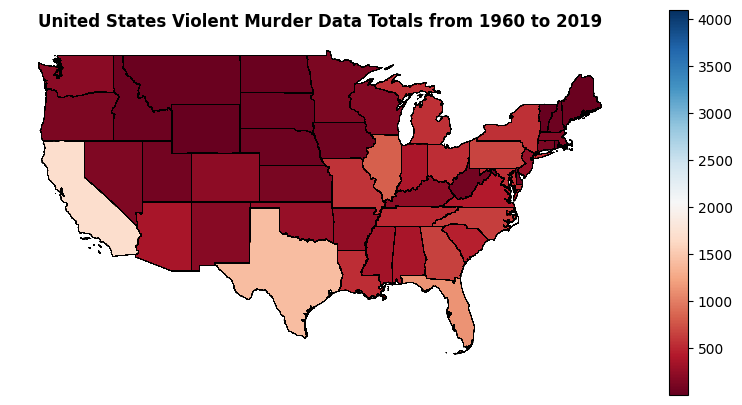

In [24]:
df = pd.read_csv("state_crime.csv")
df = df.drop("Year",axis=1)
df = df.drop("Data.Population",axis=1)
df = df.drop("Data.Rates.Property.All",axis=1)
df = df.drop("Data.Rates.Property.Burglary",axis=1)
df = df.drop("Data.Rates.Property.Larceny",axis=1)
df = df.drop("Data.Rates.Property.Motor",axis=1)
df = df.drop("Data.Rates.Violent.All",axis=1)
df = df.drop("Data.Rates.Violent.Assault",axis=1)
df = df.drop("Data.Rates.Violent.Rape",axis=1)
df = df.drop("Data.Rates.Violent.Robbery",axis=1)
df = df.drop("Data.Rates.Violent.Murder",axis=1)
df = df.drop("Data.Totals.Property.All",axis=1)
df = df.drop("Data.Totals.Property.Burglary",axis=1)
df = df.drop("Data.Totals.Property.Larceny",axis=1)
df = df.drop("Data.Totals.Property.Motor",axis=1)
df = df.drop("Data.Totals.Violent.All",axis=1)
df = df.drop("Data.Totals.Violent.Assault",axis=1)
df = df.drop("Data.Totals.Violent.Rape",axis=1)
df = df.drop("Data.Totals.Violent.Robbery",axis=1)
df

shape_path = 'cb_2018_us_state_500k (1).zip'
shape = gpd.read_file(shape_path)
shape = pd.merge(
    left=shape,
    right=df,
    left_on='NAME',
    right_on='State',
    how='left'
)

shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
shape.plot(ax=ax, column='Data.Totals.Violent.Murder', legend=True, cmap='RdBu')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('United States Violent Murder Data Totals from 1960 to 2019', size=12, weight='bold')

plt.show()
